
===== MMA Data Analysis Assistant =====
Ask questions about MMA fighters. The assistant can analyze data and create visualizations.
Type 'quit' to exit or 'clear' to reset conversation.



Executing code:
```python
import pandas as pd

# Assuming the DataFrame is already loaded as fighter_df
jon_jones = fighter_df[fighter_df['Fighter'] == 'Jon Jones']
print(jon_jones)
```

MMA Assistant:


 To find information about Jon Jones, we can filter the `fighter_df` DataFrame to include only rows where the 'Fighter' column matches 'Jon Jones'. Here is the Python code to do that:

```python
import pandas as pd

# Assuming the DataFrame is already loaded as fighter_df
jon_jones = fighter_df[fighter_df['Fighter'] == 'Jon Jones']
print(jon_jones)
```

This will display the row(s) in the `fighter_df` DataFrame where the 'Fighter' column contains 'Jon Jones'. Please note that since Jon Jones is a well-known MMA fighter, there should be exactly one entry in the dataset for him. If you want to see more details about Jon Jones, such as his nickname, birth date, nationality, hometown, association, weight class, height, wins, losses, and other relevant statistics, you can access these columns directly from the resulting DataFrame:

```python
print(jon_jones[['Nickname', 'Birth Date', 'Nationality', 'Hometown', 'Association', 'Weight Class', 'Height', 'Wins', 'Losses']])
```

This will give you a concise overview of Jon Jones' MMA career details.

**Code Execution Output:**
```
Empty DataFrame
Columns: [Fighter, Nickname, Birth Date, Nationality, Hometown, Association, Weight Class, Height, Wins, Losses, Win_Decision, Win_KO, Win_Sub, Loss_Decision, Loss_KO, Loss_Sub, Fighter_ID]
Index: []

```


Executing code:
```python
import pandas as pd

# Filtering the DataFrame for fighters with KO wins
ko_wins = fighter_df[fighter_df['Win_KO'] > 0]

# Sorting by 'Win_KO' in descending order and selecting the top 5
top_ko_winners = ko_wins.sort_values(by='Win_KO', ascending=False).head(5)

# Displaying the result
print(top_ko_winners[['Fighter', 'Nickname', 'Weight Class', 'Height', 'Wins', 'Losses', 'Win_KO']])
```

MMA Assistant:


 To find the top 5 fighters with the most KO wins, we can filter the `fighter_df` DataFrame to include only rows where the 'Win_KO' column is greater than zero and then sort the DataFrame by 'Win_KO' in descending order. Here is the Python code to do that:

```python
import pandas as pd

# Filtering the DataFrame for fighters with KO wins
ko_wins = fighter_df[fighter_df['Win_KO'] > 0]

# Sorting by 'Win_KO' in descending order and selecting the top 5
top_ko_winners = ko_wins.sort_values(by='Win_KO', ascending=False).head(5)

# Displaying the result
print(top_ko_winners[['Fighter', 'Nickname', 'Weight Class', 'Height', 'Wins', 'Losses', 'Win_KO']])
```

This code will output the top 5 fighters with the most KO wins, including their name, nickname, weight class, height, total wins, total losses, and number of KO wins.

**Code Execution Output:**
```
            Fighter       Nickname  Weight Class Height  Wins  Losses  Win_KO
2473  travis fulton    the ironman   heavyweight    6'0   255      54     143
2408   travis wiuff         diesel   heavyweight    6'3    78      22      39
1584      joe riggs         diesel  welterweight    6'0    49      18      37
2163     paul daley         semtex  welterweight    5'9    43      18      35
2112   gilbert yvel  the hurricane   heavyweight    6'2    40      16      34

```


Executing code:
```python
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'Weight Class' and calculating the sum of wins
weight_class_wins = fighter_df.groupby('Weight Class')['Wins'].sum()

# Plotting the distribution using a bar plot
plt.figure(figsize=(12, 6))
weight_class_wins.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wins Across Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()
```


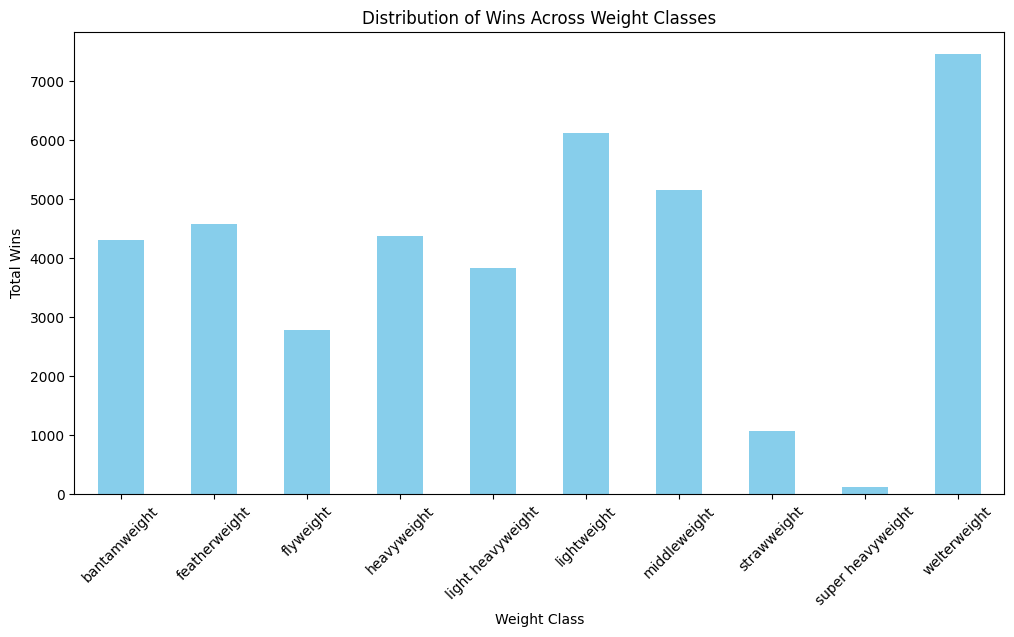


MMA Assistant:


 To show the distribution of wins across weight classes, we can use Python's `pandas` library to group the data by 'Weight Class' and then calculate the sum of wins for each weight class. We can also visualize this distribution using a bar plot from `matplotlib`. Here is the code to achieve this:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'Weight Class' and calculating the sum of wins
weight_class_wins = fighter_df.groupby('Weight Class')['Wins'].sum()

# Plotting the distribution using a bar plot
plt.figure(figsize=(12, 6))
weight_class_wins.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wins Across Weight Classes')
plt.xlabel('Weight Class')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()
```

This code will generate a bar plot showing the number of wins for each weight class, allowing you to visualize which weight classes have the highest and lowest win counts.

**Code Execution Output:**
```

```

Goodbye!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.schema.output_parser import StrOutputParser
import io
import sys
import re
from IPython.display import display, Markdown

# Load the fighter data
fighter_df = pd.read_csv('data-raw/fighter_info.csv')

# Initialize the code-capable model
llm = OllamaLLM(model="deepseek-coder-v2")

# Create a prompt template that includes the data schema and allows for code execution
prompt = PromptTemplate(
    input_variables=["history", "question", "data_description"],
    template="""
You are an MMA data analyst assistant with the ability to write and execute Python code to answer questions.

# Available Data:
{data_description}

# Conversation History:
{history}

# Current Question:
{question}

First, think about whether this question requires data analysis. If it does:
1. Write Python code to analyze the data
2. The code should be enclosed in ```python and ``` tags
3. Make sure to include visualization code if relevant
4. Keep your code concise and focused on answering the question

If the question doesn't require code execution, just provide a direct answer.

Your response:
"""
)

# Create a description of the data
data_sample = fighter_df.head(3).to_string()
data_columns = fighter_df.columns.tolist()
data_description = f"""
The fighter_df DataFrame contains information about MMA fighters with the following columns:
{data_columns}

Sample data:
{data_sample}

You can use this DataFrame directly in your code as 'fighter_df'.
"""

# Initialize conversation history
conversation_history = []

def format_history():
    """Format conversation history for the prompt"""
    if not conversation_history:
        return "No previous conversation."
    
    formatted = []
    for i, (q, a) in enumerate(conversation_history[-3:]):  # Only include last 3 exchanges
        formatted.append(f"Question: {q}")
        formatted.append(f"Answer: {a}")
    
    return "\n".join(formatted)

def extract_code(response):
    """Extract Python code from the response"""
    code_blocks = re.findall(r'```python(.*?)```', response, re.DOTALL)
    if code_blocks:
        return code_blocks[0].strip()
    return None

def execute_code(code):
    """Execute Python code and capture output"""
    # Redirect stdout to capture print statements
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout
    
    # Create a dictionary of local variables to pass to exec
    local_vars = {'fighter_df': fighter_df, 'pd': pd, 'np': np, 'plt': plt}
    
    result = None
    fig = None
    
    try:
        # Execute the code
        exec(code, globals(), local_vars)
        
        # Check if a matplotlib figure was created
        if 'plt' in local_vars and plt.get_fignums():
            fig = plt.gcf()
            
        # Capture printed output
        output = new_stdout.getvalue()
        
        # If there's a return value in the last line, capture it
        last_line = code.strip().split('\n')[-1]
        if not last_line.startswith(('print', 'plt', 'fig', '#', 'for', 'if', 'else', 'def', 'return')):
            result = eval(last_line, globals(), local_vars)
            
    except Exception as e:
        output = f"Error executing code: {str(e)}"
    finally:
        # Restore stdout
        sys.stdout = old_stdout
    
    return output, result, fig

def query_mma_assistant(query_text):
    """Process a query, execute any code, and return a response"""
    # Format history
    history = format_history()
    
    # Get AI response
    response = llm.invoke(
        prompt.format(
            history=history,
            question=query_text,
            data_description=data_description
        )
    )
    
    # Check if there's code to execute
    code = extract_code(response)
    
    if code:
        print("\nExecuting code:")
        print(f"```python\n{code}\n```")
        
        # Execute the code
        output, result, fig = execute_code(code)
        
        # Display the figure if one was created
        if fig:
            plt.figure(fig.number)
            plt.show()
        
        # Format the final response with code execution results
        final_response = f"{response}\n\n**Code Execution Output:**\n```\n{output}\n```"
        
        if result is not None and not isinstance(result, plt.Figure):
            final_response += f"\n\n**Result:**\n```\n{result}\n```"
    else:
        final_response = response
    
    # Add to conversation history
    conversation_history.append((query_text, final_response))
    
    return final_response

# Interactive loop for Jupyter
print("\n===== MMA Data Analysis Assistant =====")
print("Ask questions about MMA fighters. The assistant can analyze data and create visualizations.")
print("Type 'quit' to exit or 'clear' to reset conversation.")

# Run this cell to start the interactive loop
from IPython.display import clear_output

while True:
    query = input("\nYour question: ")
    
    if query.lower() in ['quit', 'exit', 'q']:
        print("Goodbye!")
        break
        
    if query.lower() in ['clear', 'reset']:
        conversation_history = []
        print("Conversation history cleared.")
        continue
        
    if not query.strip():
        continue
    
    response = query_mma_assistant(query)
    
    print("\nMMA Assistant:")
    display(Markdown(response))